## IMDb Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 1. Check and Drop Missing Values In The Dataset

In [4]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

### 2. Check For Duplicate Data

In [7]:
df.duplicated().any()

False

### 3. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

In [11]:
df[df['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

### 4. In Which Year There Was The Highest Average Voting?

In [14]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

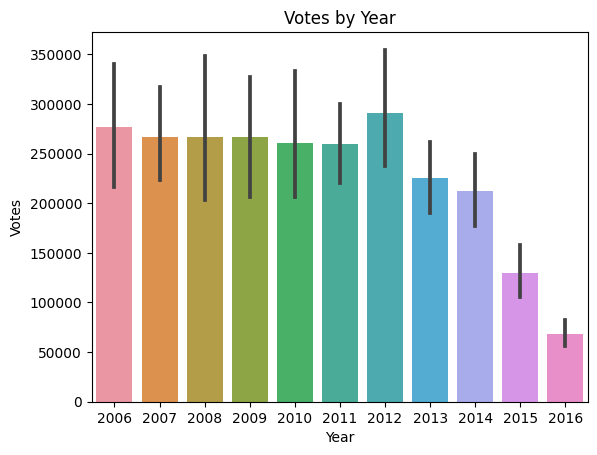

In [17]:
sb.barplot(x='Year',y='Votes',data=df)
plt.title("Votes by Year")
plt.show()

### 5. In Which Year There Was The Highest Average Revenue?

In [20]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

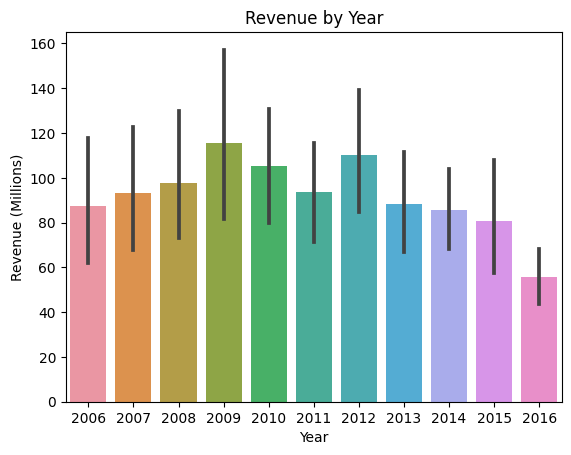

In [21]:
sb.barplot(x='Year',y='Revenue (Millions)',data=df)
plt.title("Revenue by Year")
plt.show()

### 6. Find The Average Rating For Each Director

In [24]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

### 7. Display Top 10 Lengthy Movies Title and Runtime

In [37]:
df1=df.sort_values(by=['Runtime (Minutes)'],ascending=False)[['Title','Runtime (Minutes)']].head(10)
df1

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
36,Interstellar,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


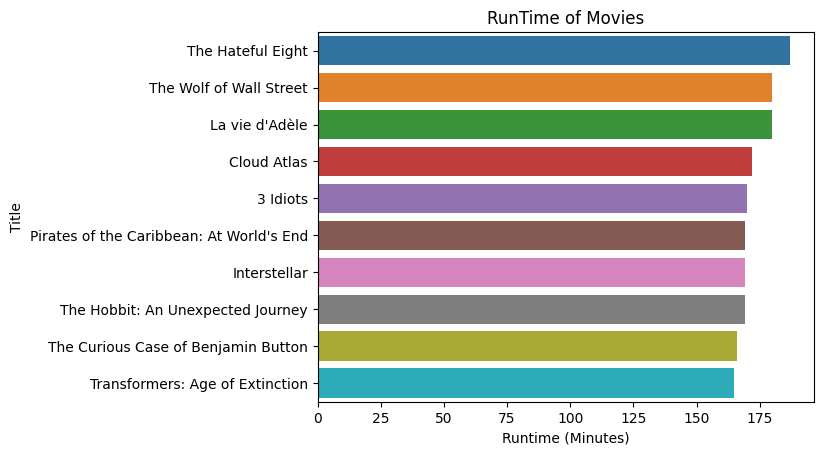

In [35]:
sb.barplot(x='Runtime (Minutes)',y='Title',data=df1)
plt.title("RunTime of Movies")
plt.show()

### 8. Display Number of Movies Per Year

In [41]:
df['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

### 9. Find Most Popular Movie Title (Highest Revenue)

In [48]:
df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

### 10. Display Top 10 Highest Rated Movie Titles And its Directors

In [57]:
df2=df.sort_values(by=['Rating'],ascending=False)[['Title','Director','Rating']].head(10)

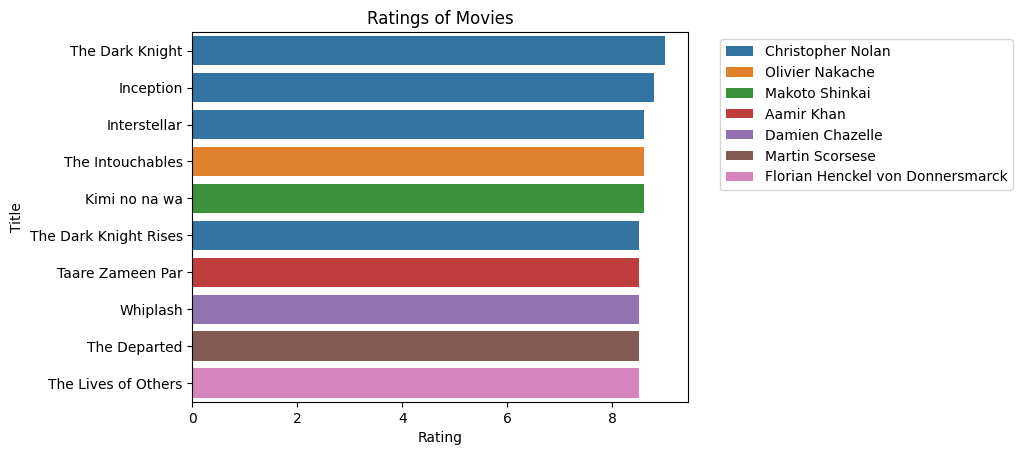

In [69]:
sb.barplot(x='Rating',y='Title',data=df2,hue='Director',dodge=False)
plt.title("Ratings of Movies")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

### 11. Display Top 10 Highest Revenue Movie Titles

In [72]:
df.sort_values(by=['Revenue (Millions)'],ascending=False)[['Title','Revenue (Millions)']].head(10)

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


### 12. Does Rating Affect The Revenue?

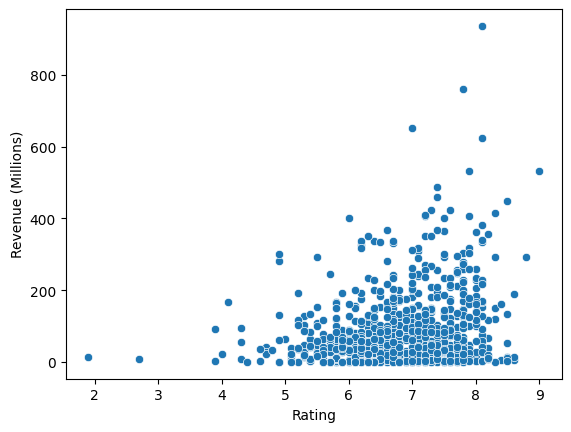

In [74]:
sb.scatterplot(x='Rating',y='Revenue (Millions)',data=df)
plt.show()

#Yes! Movies with High Revenue and scattered over the 6-9 range of the Ratings aixs.

### 13. Classify Movies Based on Ratings [Excellent, Good, Average and Poor]

In [82]:
def rate(rating):
    if rating>=7.5:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    elif rating>=4.5:
        return 'Average'
    else:
        return 'Poor'

In [83]:
df['rate_category']=df['Rating'].apply(rate)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rate_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


### 14. Count Number of Action Movies

In [87]:
len(df[df['Genre'].str.contains('action',case=False)])

277

### 15. Find Unique Values From Genre 

In [97]:
two_d=[]
for value in df['Genre']:
    two_d.append(value.split(','))

In [99]:
one_d=[]
for value in two_d:
    for value1 in value:
        one_d.append(value1)

In [102]:
genre_unique=[]
for value in one_d:
    if value not in genre_unique:
        genre_unique.append(value)

In [103]:
genre_unique

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

### 16. How Many Films of Each Genre Were Made?

In [105]:
from collections import Counter

In [111]:
Counter(one_d)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})